#  Опорные объекты

- работа с методом опорных векторов (SVM)
- нахождение наиболее важных объектов выборки

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [4]:
X = pd.read_csv('svm-data.csv', header=None)

In [5]:
X

,0,1,2
0,0.0,0.70,0.29
1,1.0,0.23,0.55
2,0.0,0.72,0.42
3,0.0,0.98,0.68
4,0.0,0.48,0.39
5,1.0,0.34,0.73
6,0.0,0.44,0.06
7,1.0,0.40,0.74
8,0.0,0.18,0.18
9,1.0,0.53,0.53


Метод опорных векторов реализован в классе sklearn.svm.SVC.

Основными параметрами этого класса являются коэффициент С и тип ядра kernel. В данной задаче мы будем использовать линейное ядро — для этого нужно задать значение параметра kernel='linear'
Индексы опорных объектов обученного классификатора хранятся в поле support_

In [23]:
clf = SVC(kernel='linear', random_state=241, C = 100000)

In [24]:
clf.fit(X_train, y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
X_train = X[X.columns[1:3]]

In [19]:
y = X[X.columns[0]]

In [20]:
X_train

,1,2
0,0.70,0.29
1,0.23,0.55
2,0.72,0.42
3,0.98,0.68
4,0.48,0.39
5,0.34,0.73
6,0.44,0.06
7,0.40,0.74
8,0.18,0.18
9,0.53,0.53


In [21]:
y

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
6    0.0
7    1.0
8    0.0
9    1.0
Name: 0, dtype: float64

In [26]:
clf.get_params(clf)

{'C': 100000,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 241,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [27]:
print clf.support_+1

[ 4  5 10]


In [28]:
print clf.support_vectors_

[[0.98 0.68]
 [0.48 0.39]
 [0.53 0.53]]


In [29]:
clf.n_support_

array([2, 1])

# Text analytics (SVC)

В этом задании мы применим метод опорных векторов для определения того, к какой из тематик относится новость: атеизм или космос.

Одна из причин популярности линейных методов заключается в том, что они хорошо работают на разреженных данных. Так называются выборки с большим количеством признаков, где на каждом объекте большинство признаков равны нулю. Разреженные данные возникают, например, при работе с текстами. Дело в том, что текст удобно кодировать с помощью "мешка слов" — формируется столько признаков, сколько всего уникальных слов встречается в текстах, и значение каждого признака равно числу вхождений в документ соответствующего слова. Ясно, что общее число различных слов в наборе текстов может достигать десятков тысяч, и при этом лишь небольшая их часть будет встречаться в одном конкретном тексте.

Можно кодировать тексты хитрее, и записывать не количество вхождений слова в текст, а TF-IDF. Это показатель, который равен произведению двух чисел: TF (term frequency) и IDF (inverse document frequency). Первая равна отношению числа вхождений слова в документ к общей длине документа. Вторая величина зависит от того, в скольки документах выборки встречается это слово. Чем больше таких документов, тем меньше IDF. Таким образом, TF-IDF будет иметь высокое значение для тех слов, которые много раз встречаются в данном документе, и редко встречаются в остальных.

In [42]:
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [31]:
newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space'])

In [35]:
vectorizer = TfidfVectorizer()

In [36]:
X = vectorizer.fit_transform(newsgroups.data)

In [44]:
parameter_grid = {
    'C': np.power(10.0, np.arange(-5, 6))
}
cv = KFold( n_splits=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
grid_searcher = GridSearchCV(clf, parameter_grid, scoring='accuracy', cv=cv)
grid_searcher.fit(X, newsgroups.target)
clf_best = grid_searcher.best_estimator_
 
print('Best params = ', clf_best.get_params())

('Best params = ', {'kernel': 'linear', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': 'ovr', 'random_state': 241, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None})


In [48]:
clf_ = SVC(kernel='linear', random_state=241, C = 1)

In [49]:
clf_.fit(X, newsgroups.target)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

In [176]:
results = clf_best.coef_ 

row1 = results.getrow(0).toarray()[0].ravel()

In [177]:
row1

array([ 0.29258057, -0.12314757,  0.        , ...,  0.01972862,
        0.05831336, -0.00297347])

In [178]:
c=np.argsort(abs(row1))[-10:]

In [179]:
c

array([22936, 15606,  5776, 21850, 23673, 17802,  5093,  5088, 12871,
       24019], dtype=int64)

In [181]:
words=[]
feature_mapping = vectorizer.get_feature_names()
for i in c:
    print feature_mapping[i]
    words.append(feature_mapping[i])

sci
keith
bible
religion
sky
moon
atheists
atheism
god
space


In [183]:
sorted(words)

[u'atheism',
 u'atheists',
 u'bible',
 u'god',
 u'keith',
 u'moon',
 u'religion',
 u'sci',
 u'sky',
 u'space']

# Logistic regression

- работа с логистической регрессией
- реализовка градиентного спуска для ее настройки
- использование регуляризации

Задача:  самостоятельно реализовать градиентный спуск.

Логистическая регрессия — один из видов линейных классификаторов. Одной из ее особенностей является возможность оценивания вероятностей классов, тогда как большинство линейных классификаторов могут выдавать только номера классов.

In [357]:
import math
from sklearn.metrics import roc_auc_score

In [199]:
data = pd.read_csv('data-logistic.csv', header=None)

In [201]:
X_train = data[data.columns[1:3]]

In [202]:
y = data[data.columns[0]]

In [206]:
X_train.size

410

In [240]:
y.size

205

In [210]:
X_train[X_train.columns[1]][0]

-0.138525716794

In [208]:
0.1*(1.0/X_train.size)

0.00024390243902439024

In [287]:
def grad(w, X, Y, k, N):
    w_new = new_w(w, X, Y, k, N)
    print ("N = "+str(N))
    while (np.linalg.norm(np.array(w_new)-np.array(w))>0.00001) and (N>0):
        print ('w = '+str(w))
        print ('w_new = '+str(w_new))
        print ('e = '+ str(np.linalg.norm(np.array(w_new)-np.array(w))))
        N=N-1
        grad(w_new, X,Y, k,N)
   # w_new_0 = w[0] + k*(1.0/X.size)*sum(X,Y,w,0)
   # w_new_1 = w[1] + k*(1.0/X.size)*sum(X,Y,w,1)
   # w=[w_new_0, w_new_1]
   # k=k-1
        
    return w_new

In [349]:
def summa(X, Y, w, col):
    summ=0.
    for i in range(0, Y.size):
        y=Y.iloc[i]
        x_i=X[X.columns[col]].iloc[i]
        x0_i =X[X.columns[0]].iloc[i]
        x1_i=X[X.columns[1]].iloc[i]
        summ=summ+y*x_i*(1.0 - (1.0/(1.0+ np.exp(-y*(w[0]*x0_i+w[1]*x1_i)))))
    return summ

In [350]:
new_w = new_w([0,0], X_train, y, 0.1, 1000)
new_w

TypeError: 'list' object is not callable

In [290]:
np.linalg.norm(np.array(new_w)-np.array(w))

0.04841640193274456

In [299]:
def new_w(w, X, Y, k, N):
    w_new_0 = w[0] + k*(1.0/(y.size))*summa(X,Y,w,0)
    w_new_1 = w[1] + k*(1.0/(y.size))*summa(X,Y,w,1)
    w=[w_new_0, w_new_1]
    return w

In [ ]:
def grad_L2(w, X, Y, k, C, e, N):
    while ( np.linalg.norm(new_w_L2(w)-w)>0.00001 & N>0)
    w_new = new_w_L2(w)
    N=N-1
    grad_L2(w_new, X,Y, k,N)
    return w

In [ ]:
def new_w_L2(w, X, Y, k, N):
    w_new_0 = w[0] + k*(1.0/X.size)*summa(X,Y,w,0)- k*C*w[0]
    w_new_1 = w[1] + k*(1.0/X.size)*summa(X,Y,w,1)- k*C*w[1]
    w=[w_new_0, w_new_1]
    return w

In [292]:
w=[0.0,0.0]
w_new = grad(w, X_train, y, 0.1, 10000)

N = 10000
w = [0, 0]
w_new = [0.03573170657959757, 0.0326709828597582]
e = 0.04841640193274456
N = 9999
w = [0.03573170657959757, 0.0326709828597582]
w_new = [0.06240774379088754, 0.05560590738390264]
e = 0.03517984826894978
N = 9998
w = [0.06240774379088754, 0.05560590738390264]
w_new = [0.08337872154844328, 0.07258485619548255]
e = 0.02698270947948238
N = 9997
w = [0.08337872154844328, 0.07258485619548255]
w_new = [0.10057964293921712, 0.08574888985604347]
e = 0.0216601818761515
N = 9996
w = [0.10057964293921712, 0.08574888985604347]
w_new = [0.11508877021146756, 0.09625783294745767]
e = 0.017915151662794927
N = 9995
w = [0.11508877021146756, 0.09625783294745767]
w_new = [0.12756076573335465, 0.10479828622899222]
e = 0.015115886164960552
N = 9994
w = [0.12756076573335465, 0.10479828622899222]
w_new = [0.1384274152363304, 0.11181422477538334]
e = 0.012934738694974086
N = 9993
w = [0.1384274152363304, 0.11181422477538334]
w_new = [0.14799239849139809, 0.1176133334955447]
e = 0.01118564

N = 9934
w = [0.26424319749409975, 0.11597516041337427]
w_new = [0.2647288744536736, 0.11553172839908514]
e = 0.000657658011703212
N = 9933
w = [0.2647288744536736, 0.11553172839908514]
w_new = [0.2652024255701528, 0.1150982571902991]
e = 0.0006419874989165291
N = 9932
w = [0.2652024255701528, 0.1150982571902991]
w_new = [0.26566420651396, 0.11467457719615749]
e = 0.0006266948041106814
N = 9931
w = [0.26566420651396, 0.11467457719615749]
w_new = [0.26611455718731936, 0.11426051540252015]
e = 0.0006117702983517589
N = 9930
w = [0.26611455718731936, 0.11426051540252015]
w_new = [0.26655380287972397, 0.11385589625841314]
e = 0.0005972046802176767
N = 9929
w = [0.26655380287972397, 0.11385589625841314]
w_new = [0.26698225531286895, 0.11346054245554689]
e = 0.0005829889509318881
N = 9928
w = [0.26698225531286895, 0.11346054245554689]
w_new = [0.26740021358653326, 0.1130742756125683]
e = 0.0005691143931663417
N = 9927
w = [0.26740021358653326, 0.1130742756125683]
w_new = [0.267807965035671, 

N = 9869
w = [0.2802641405132467, 0.10107707504511365]
w_new = [0.28036507672214206, 0.1009829898332988]
e = 0.00013798603316426408
N = 9868
w = [0.28036507672214206, 0.1009829898332988]
w_new = [0.2804636257260374, 0.10089113769060143]
e = 0.00013471719373138815
N = 9867
w = [0.2804636257260374, 0.10089113769060143]
w_new = [0.2805598439964042, 0.10080146547655944]
e = 0.00013152589677921018
N = 9866
w = [0.2805598439964042, 0.10080146547655944]
w_new = [0.2806537866660453, 0.10071392131937182]
e = 0.00012841029801765637
N = 9865
w = [0.2806537866660453, 0.10071392131937182]
w_new = [0.2807455075611931, 0.10062845458567792]
e = 0.00012536859724436401
N = 9864
w = [0.2807455075611931, 0.10062845458567792]
w_new = [0.28083505923279684, 0.10054501585102633]
e = 0.00012239903728085717
N = 9863
w = [0.28083505923279684, 0.10054501585102633]
w_new = [0.2809224929870227, 0.10046355687102225]
e = 0.00011949990293442237
N = 9862
w = [0.2809224929870227, 0.10046355687102225]
w_new = [0.28100785

N = 9806
w = [0.2835871225380065, 0.09798417053875312]
w_new = [0.2836094654593142, 0.09796340731144694]
e = 3.0501110483561852e-05
N = 9805
w = [0.2836094654593142, 0.09796340731144694]
w_new = [0.283631279875777, 0.09794313565123712]
e = 2.9779338026148773e-05
N = 9804
w = [0.283631279875777, 0.09794313565123712]
w_new = [0.28365257828766943, 0.0979233439114868]
e = 2.90746506682935e-05
N = 9803
w = [0.28365257828766943, 0.0979233439114868]
w_new = [0.2836733728996583, 0.09790402072191239]
e = 2.8386643744856465e-05
N = 9802
w = [0.2836733728996583, 0.09790402072191239]
w_new = [0.2836936756277913, 0.09788515498200724]
e = 2.771492218661003e-05
N = 9801
w = [0.2836936756277913, 0.09788515498200724]
w_new = [0.28371349810631974, 0.0978667358546227]
e = 2.7059100292108995e-05
N = 9800
w = [0.28371349810631974, 0.0978667358546227]
w_new = [0.28373285169436097, 0.09784875275970269]
e = 2.6418801505212047e-05
N = 9799
w = [0.28373285169436097, 0.09784875275970269]
w_new = [0.2837517474824

N = 9739
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9738
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9737
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9736
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9735
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9734
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9733
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9732
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9676
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9675
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9674
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9673
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9672
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9671
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9670
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9669
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9607
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9606
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9605
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9604
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9603
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9602
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9601
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9600
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9543
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9542
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9541
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9540
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9539
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9538
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9537
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9536
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9478
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9477
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9476
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9475
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9474
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9473
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9472
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9471
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9410
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9409
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9408
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9407
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9406
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9405
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9404
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9403
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9346
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9345
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9344
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9343
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9342
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9341
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9340
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9339
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9283
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9282
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9281
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9280
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9279
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9278
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9277
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9276
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9220
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9219
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9218
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9217
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9216
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9215
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9214
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9213
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9155
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9154
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9153
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9152
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9151
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9150
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9149
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9148
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9091
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9090
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9089
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9088
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9087
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9086
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9085
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9084
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 9023
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9022
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9021
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9020
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9019
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9018
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9017
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 9016
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8959
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8958
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8957
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8956
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8955
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8954
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8953
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8952
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8891
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8890
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8889
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8888
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8887
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8886
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8885
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8884
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8827
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8826
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8825
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8824
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8823
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8822
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8821
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8820
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8762
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8761
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8760
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8759
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8758
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8757
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8756
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8755
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8694
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8693
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8692
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8691
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8690
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8689
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8688
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8687
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8627
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8626
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8625
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8624
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8623
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8622
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8621
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8620
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8563
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8562
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8561
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8560
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8559
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8558
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8557
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8556
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8497
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8496
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8495
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8494
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8493
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8492
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8491
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8490
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8432
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8431
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8430
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8429
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8428
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8427
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8426
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8425
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8369
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8368
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8367
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8366
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8365
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8364
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8363
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8362
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8302
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8301
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8300
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8299
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8298
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8297
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8296
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8295
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

N = 8234
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8233
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8232
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8231
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8230
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8229
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8228
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.2842250576566995, 0.09739151367001521]
e = 1.013785562475509e-05
N = 8227
w = [0.28421762933778066, 0.09739841266955926]
w_new = [0.284225057

KeyboardInterrupt: 

In [321]:
X_train.head(3)

,1,2
0,-0.663827,-0.138526
1,1.994596,2.468025
2,-1.247395,0.749425


In [366]:
X_train = data.values[:,1:]
Y = data.values[:, :1].T[0]

SyntaxError: keyword can't be an expression (<ipython-input-366-ee9ff94fcb63>, line 3)

In [382]:
def gradietion(w, X, Y, k,C):
    w1, w2 = w
    for i in range(100):
        w1_new = w1 + k* np.mean(Y * X[:,0] * (1 - (1./(1 + np.exp(-Y * (w1*X[:,0] + w2*X[:,1])))))) - k*C*w1
        w2_new = w2 + k* np.mean(Y * X[:,1] * (1 - (1./(1 + np.exp(-Y * (w1*X[:,0] + w2*X[:,1])))))) - k*C*w2
        w3 = [w1_new, w2_new]
        w4=[w1,w2]
        if np.linalg.norm(np.array(w3)-np.array(w4))<0.00001:
            break
        w1,w2 = w1_new, w2_new
        
    return [w1, w2]
    

In [356]:
w=[0.0,0.0]
w_new = gradietion( w,X_train, Y, 0.1, 0)
w_new

[0.28780442348832036, 0.09198995719421853]

In [374]:
def logistic_regression(w, X, Y):
    a=[]
    for i in range(len(X)):
        b=1. / (1. + np.exp(-w[0]*X[i,0] - w[1]*X[i,1]))
        a.append(b)
    score = roc_auc_score(Y,a)
    return score

In [375]:
lr_0 = logistic_regression(w_new, X_train, Y)

In [376]:
lr_0

0.9268571428571428

In [378]:
w=[0., 0.]
w_new_L2 = gradietion( w,X_train, Y, 0.1, 10)
w_new_L2

[0.028561965517012657, 0.024783655436404747]

In [379]:
lr_0 = logistic_regression(w_new_L2, X_train, Y)

In [372]:
lr_0

0.9362857142857142

In [380]:
w=[100. , 100.]
w_new_L3 = gradietion( w,X_train, Y, 0.1, 10)
w_new_L3
lr_1 = logistic_regression(w_new_L2, X_train, Y)
lr_1

C:\Elizaveta\AnacPhyton\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Elizaveta\AnacPhyton\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


0.9362857142857142

In [381]:
w_new_L3

[0.02855777997073599, 0.024779069433452247]

In [383]:
w=[0. , 0.]
w_new_L3 = gradietion( w,X_train, Y, 0.1, 10)
w_new_L3
lr_1 = logistic_regression(w_new_L2, X_train, Y)
lr_1

0.9362857142857142

In [384]:
w_new_L3

[0.028561965517012657, 0.024783655436404747]

In [385]:
w=[0. , 0.]
w_new_L3 = gradietion( w,X_train, Y, 0.1, 0)
w_new_L3
lr_1 = logistic_regression(w_new_L2, X_train, Y)
lr_1

0.9362857142857142

# Metrics

- вычисление различных мер качества классификации: доли правильных ответов, точность, полноту, AUC-ROC и т.д.
- сравнение алгоритмов классификации при наличии ограничений на точность или полноту

В задачах классификации может быть много особенностей, влияющих на подсчет качества: различные цены ошибок, несбалансированность классов и т.д. Из-за этого существует большое количество метрик качества — каждая из них рассчитана на определенное сочетание свойств задачи и требований к ее решению.

Меры качества классификации можно разбить на две большие группы: предназначенные для алгоритмов, выдающих номера классов, и для алгоритмов, выдающих оценки принадлежности к классам. К первой группе относятся доля правильных ответов, точность, полнота, F-мера. Ко второй — площади под ROC- или PR-кривой.

In [457]:
from sklearn.metrics import accuracy_score
from  sklearn.metrics import precision_score
from  sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [386]:
df = pd.read_csv('classification.csv')

In [458]:
df.head(3)

,true,pred
0,1,0
1,1,1
2,1,1


In [412]:
TP = df[(df.true==1) & (df.pred==1)]
print ('TP = ' + str(len(TP)))

TP = 43


In [413]:
FP = df[(df.true==0) & (df.pred==1)]
print ('FP = ' + str(len(FP)))

FP = 34


In [414]:
TN = df[(df.true==0) & (df.pred==0)]
print ('TN = ' + str(len(TN)))

TN = 64


In [415]:
FN = df[(df.true==1) & (df.pred==0)]
print ('FN = ' + str(len(FN)))

FN = 59


In [433]:
y_true=df[df.columns[0]]
y_pred=df[df.columns[1]]
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print('acc = ' + str(acc) + '\n' +
     'precision = ' + str(precision) + '\n' +
     'recall = ' + str(recall) + '\n'+
     'f1 = ' + str(f1))

acc = 0.535
precision = 0.5584415584415584
recall = 0.4215686274509804
f1 = 0.48044692737430167


In [435]:
scores = pd.read_csv('scores.csv')

 Имеется четыре обученных классификатора. В файле scores.csv записаны истинные классы и значения степени принадлежности положительному классу для каждого классификатора на некоторой выборке:

для логистической регрессии — вероятность положительного класса (колонка score_logreg),
для SVM — отступ от разделяющей поверхности (колонка score_svm),
для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn),
для решающего дерева — доля положительных объектов в листе (колонка score_tree).

In [437]:
scores.head(3)

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000


 Посчитать площадь под ROC-кривой для каждого классификатора. 
 Какой классификатор имеет наибольшее значение метрики AUC-ROC?
 Какой классификатор достигает наибольшей точности (Precision) при полноте (Recall) не менее 70% ?

In [504]:
score_logreg = scores[scores.columns[1]]
y_true_ = scores[scores.columns[0]]

In [537]:
y_true.head(3)

0    1
1    1
2    1
Name: true, dtype: int64

In [505]:
auc_roc_logreg = roc_auc_score(y_true_, score_logreg)
print ('auc_roc_logreg_score = ' + str(auc_roc_logreg))

auc_roc_logreg_score = 0.719187675070028


In [506]:
score_svm = scores[scores.columns[2]]
auc_roc_svm = roc_auc_score(y_true_, score_svm)
print ('auc_roc_svm_score = ' + str(auc_roc_svm))

auc_roc_svm_score = 0.7086834733893557


In [507]:
score_knn = scores[scores.columns[3]]
auc_roc_knn = roc_auc_score(y_true_, score_knn)
print ('auc_roc_knn_score = ' + str(auc_roc_knn))

auc_roc_knn_score = 0.6351540616246498


In [508]:
score_tree = scores[scores.columns[4]]
auc_roc_tree = roc_auc_score(y_true_, score_tree)
print ('auc_roc_tree_score = ' + str(auc_roc_tree))

auc_roc_tree_score = 0.6919267707082833


In [509]:
score_logreg.head(3)

0    0.683832
1    0.801966
2    0.382315
Name: score_logreg, dtype: float64

In [510]:
score_svm.head(3)

0    0.145976
1    0.239511
2   -0.245701
Name: score_svm, dtype: float64

In [511]:
score_knn.head(3)

0    0.787063
1    1.000000
2    0.000000
Name: score_knn, dtype: float64

In [512]:
score_tree.head(3)

0    0.500000
1    0.833333
2    0.000000
Name: score_tree, dtype: float64

In [538]:
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_true_, score_logreg)

In [539]:
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_true_, score_svm)

In [540]:
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_true_, score_knn)

In [541]:
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_true_, score_tree)

In [542]:
d = {"precision_logreg":pd.Series(precision_logreg), "recall_logreg": pd.Series(recall_logreg)}

In [543]:
dataframe = pd.DataFrame(d)
dataframe.head(5)

,precision_logreg,recall_logreg
0,0.497462,1.000000
1,0.494898,0.989796
2,0.492308,0.979592
3,0.494845,0.979592
4,0.497409,0.979592


In [544]:
d_1 = {"precision_svm":pd.Series(precision_svm), "recall_svm": pd.Series(recall_svm)}
dataframe_1 = pd.DataFrame(d_1)
dataframe_1.head(5)

,precision_svm,recall_svm
0,0.492462,1.000000
1,0.489899,0.989796
2,0.492386,0.989796
3,0.489796,0.979592
4,0.492308,0.979592


In [545]:
d_2 = {"precision_knn":pd.Series(precision_knn), "recall_knn": pd.Series(recall_knn)}
dataframe_2 = pd.DataFrame(d_2)
dataframe_2.head(5)

,precision_knn,recall_knn
0,0.490000,1.000000
1,0.529032,0.836735
2,0.532468,0.836735
3,0.535948,0.836735
4,0.539474,0.836735


In [546]:
d_3 = {"precision_tree":pd.Series(precision_tree), "recall_tree": pd.Series(recall_tree)}
dataframe_3 = pd.DataFrame(d_3)
dataframe_3.head(5)

,precision_tree,recall_tree
0,0.490000,1.000000
1,0.502732,0.938776
2,0.508475,0.918367
3,0.532895,0.826531
4,0.598485,0.806122


In [547]:
data_logreg_70 = dataframe[dataframe.recall_logreg>=0.7]

In [548]:
data_svm_70=dataframe_1[dataframe_1.recall_svm>=0.7]

In [549]:
data_knn_70=dataframe_2[dataframe_2.recall_knn>=0.7]

In [550]:
data_tree_70 = dataframe_3[dataframe_3.recall_tree>=0.7]

In [551]:
dat = data_logreg_70[data_logreg_70['precision_logreg']==data_logreg_70['precision_logreg'].max()]
print dat['precision_logreg']

78    0.630252
Name: precision_logreg, dtype: float64


In [552]:
dat1 = data_svm_70[data_svm_70['precision_svm']==data_svm_70['precision_svm'].max()]
print dat1['precision_svm']

85    0.622807
Name: precision_svm, dtype: float64


In [553]:
dat2 = data_knn_70[data_knn_70['precision_knn']==data_knn_70['precision_knn'].max()]
print dat2['precision_knn']

34    0.606557
Name: precision_knn, dtype: float64


In [554]:
dat3 = data_tree_70[data_tree_70['precision_tree']==data_tree_70['precision_tree'].max()]
print dat3['precision_tree']

5    0.651786
Name: precision_tree, dtype: float64


In [555]:
data_logreg_70

,precision_logreg,recall_logreg
0,0.497462,1.000000
1,0.494898,0.989796
2,0.492308,0.979592
3,0.494845,0.979592
4,0.497409,0.979592
5,0.494792,0.969388
6,0.497382,0.969388
7,0.494737,0.959184
8,0.497354,0.959184
9,0.500000,0.959184


In [556]:
max_prec_logreg = dataframe[dataframe.recall_logreg>=0.7].max()
max_prec_logreg

precision_logreg    0.630252
recall_logreg       1.000000
dtype: float64

In [557]:
max_prec_svm = dataframe_1[dataframe_1.recall_svm>=0.7].max()
max_prec_svm

precision_svm    0.622807
recall_svm       1.000000
dtype: float64

In [558]:
max_prec_knn = dataframe_2[dataframe_2.recall_knn>=0.7].max()
max_prec_knn

precision_knn    0.606557
recall_knn       1.000000
dtype: float64

In [559]:
max_prec_tree = dataframe_3[dataframe_3.recall_tree>=0.7].max()
max_prec_tree

precision_tree    0.651786
recall_tree       1.000000
dtype: float64

recall, precision график

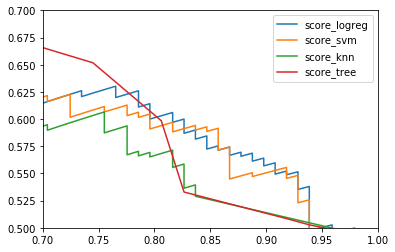

In [560]:
import matplotlib.pyplot as plt
scores = pd.read_csv('scores.csv')

ytrue = scores['true']

for algorythm in scores.columns[1:]:

    yscores = scores[algorythm]

    precision, recall, thresholds = precision_recall_curve(ytrue, yscores)

    plt.plot(recall, precision, label = algorythm)

    plt.xlim(0.7,1)

    plt.ylim(0.5, 0.7)

plt.legend()